<a href="https://colab.research.google.com/github/andresni/GameTheoryStuff/blob/master/TEKoblig1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is a notebook for Oblig 1 in TEK9010
Before we start this fun excercise, we need to import some modules for later use. Note: sorry for the long winded explanations and "proofs". This was a very fun excercise. Also, if some of the cells doesn't work, then run them a couple of times for the interactive elements to load properly. If it doesn't work, let me know and I'll send pdf versions.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.stats as sct
import copy
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from matplotlib import animation, rc, colors
from IPython.display import HTML, display

With that out of the way, let's detail some of the background information of the scenario.
1. Many people in an area (1D, 2D, or 3D) wants to connect to the internet.
2. Mobile drones fly in the air providing internet.
3. The people want to connect to the drone closest to them as it has the highest signal power.
4. The drones wants to have the most people connected to them, because that feels good.

We also need some starting assumptions that I hope are not too crazy.
1. Agents (drones/people) cannot occupy the same space at the same time.
2. People are spread uniformly in the area
___

Let's start with a game theoretic analysis with a starting point in Hotelling's 1929 paper.

Hotelling investigates how duopolies operate, specifically their location, in a 1 dimensional world. He argues that if we assume an even spread of demand along an axis, and two competitors who want to maximize their profits, then they want to have their location so as to maximize potential customers, and adjusting prices accordingly. 

Customers in Hotelling's scenario care about distance to company as that costs them  utility (i.e. transport cost, energy, comfort) and price of product. Simply, if price+distance company A > price+distance company B, then they'll go to company A.

In the drone scenario outlined above, location is the only relevant parameter.



We can solve the game in various ways. The way the game plays out is almost the same wether it's played simultaneously or sequentially, and if it's a one-shot game or a repeated game. But let's deal with each in turn for the 2 agent scenario anyway.

But first, a general observation. Across all conditions, the same is always true: the best response of agent A is always to be one unit to the left or right of agent B depending on if agent B is to the right or left of center, respectively. In other words, the best place to be is just a tiny bit closer to the center than the other agent. Reason: if $location(AgentB) = 0.8$ on a axis: $[0, 1]$, and $location(AgentA) = 0.5$, then Agent A has a utility of $0.5 - 0 + \dfrac{0.8 -0.5}{2}$ (distance to edge + half of the area between the agents). Agent B on the other hand has $1 - 0.8 + \dfrac{0.8 -0.5}{2}$. This gives $Utility(A) = 0.65$, and $Utility(B) = 0.35$, or $1 - Utility(A)$. Varying position of Agent B will give different utilities, but never better than A. As we can see, the unit that is closest to the center of the two agents covers half the area (edge to center), + distance to center + half of the distance between the two agents.

This can be seen in the interactive plot below (put Position_Agent_A to 500).

In [0]:
@interact_manual # Interactive plot
def game_plot(Position_Agent_A=(0,1000,1)): # Location of agent A, adjusted interactively!!
  lA = Position_Agent_A
  uB = [] # Utility of agent B
  for lB in range(0,1001): # Over each possible location of agent B
    if lB < lA:
      uB.append(lB + ((lA) - lB) / 2)
    if lB > lA:
      uB.append(1000 - lB + ((lB) - lA) / 2)
    if lB == lA:
      uB.append(500)
  plt.figure(); uB = np.array(uB)
  plt.plot(uB/1000,'b',label="Agent B")
  plt.plot(1-(uB/1000),'r',label="Agent A")
  plt.title("Utility as a function of position")
  plt.legend()
  plt.xlabel("Position Agent B")
  plt.ylabel("Fraction of coverage")

interactive(children=(IntSlider(value=500, description='Position_Agent_A', max=1000), Button(description='Run …

As can be seen in the above interactive plot, if both agents occupy the same spot (relaxing assumption 1) then they split the area. If agent B goes to the left of Agent A when Agent A is right of center (>500) then Agent B has the most coverage, and vice versa.
____

So let's look at the different conditions.

**Simultaneous + one-shot:** here both agents should choose the middle (coin toss for exact position since stacking is not allowed). Reason: no agent can know where the other will be, and so while the middle is not necessarily the best response given information about the location of the other agent, it's never a bad response as it will always give you more coverage than your opponent. Thus the middle for both agents is the Nash equilibrium, but not the social welfare maximum (25% / 75% location) in the Hotelling scenario. The middle is also pareto optimal/efficient as any agent will be worse off by relocating (to the benefit of the other), but then, any position is pareto optimal since the game is zero-sum in a sense.

**Simultanous + repeated:** The solution here is the same as the above, as there'll be no movement of agents due to pareto optimality and nash equilibria being in the center, unless ofcourse one agent is irrational and chooses another location and stays there, at which point Agent B should switch, though that's beyond this discussion.

**Sequential + one-shot:** The solution here is also simple. Wherever Agent A positions itself, agent B should go one unit to the left or right depending on if Agent A is right or left of center, respectively. Agent A on the other hand, should, as we learned from the two above conditions, position itself in the center. If there is an exact center, then Agent A wins as all other spots are worse for Agent B. If there is no exact center where it's possible to stand, i.e. the integer line between 1 and 6 (middle [3,4]), then they split. This is the first mover advantage.

**Sequential + repeated:** Obviously, we get the same solution here as above.

There's one additional comment to make on the above conditions. Given how calculations are made, then it's easy to see that the distance both agents have to the center needs to be equal for them to get the same utility. So, if one could plan ahead and communicate, then one could in the simultaneous games atleast maximize social welfare, but given self interested agents, we will always descend on the middle as agents defect from cooperation. This explains why coffee shops open up next to eachother along a street, or how political 2-party systems have parties that are just left and right of center (thought the real world is irrational and sometimes they push each other further and further away from the real center as can be seen in the US currently). 

However, adding more agents into the mix makes the whole scenario more interesting. The Nash is no longer in the center! In a simultaneous game, the best response (Nash) is a mixed stragety of any point in the middle two quartiles (Shaked, 1982). I discuss this a bit more at the bottom of this text as it's not part of the excercise (and I might be wrong).

The social welfare optima in a 2 drone game is achieved by splitting the game area in two, and have a drone in the center of each (positions 250/750). We can do the following to show this.

Analytically, the average distace to a point on a line can be summed up as:

$$Avg.dist. = AD = \dfrac{\dfrac{a^2}{2}+\dfrac{b^2}{2}}{a+b}$$

where $a$ is the distance from agent A's position to the left edge, and $b$ the distance to the right edge. Since $a+b$ is always the same, and knowing how exponentials work, then $argmin(AD)$ is achieved by $a = b$, proving that splitting the axis is optimal. This means that the $AD$ for a drone in the center of a 1000 long axis = 250. But since we have $n > 1$ drones, then we get

$$Global.AD = GAD = \dfrac{1}{n}\sum_{i=1}^{n}(\dfrac{\dfrac{a_i^2}{2}+\dfrac{b_i^2}{2}}{a_i+b_i})$$

where $a_i$ and $b_i$ is the distances to the left and right edges of drone $n$'s segment. As we've shown that the best way to split a line is in the middle, to minimize $AD$ then similarily, we should split the line into equally long segments so to minimize the contribution of each segment of the line to $GAD$. In fact, with $n$ drones, then the $GAD_{NASH} = n * GAD_{WELFARE}$.

Below, I show this in some other ways.


Brute force Search for social welfare maximum = 125.00 with one drone at location 250 and the other at 750

and the Nash equilibria has an average distance of 250.00 with one drone at 500 an the other at 500, as proven earlier

The 'evil dictator optimum' however is 485.10 at 1 and 2, although one drone is not very happy.

Theoretically, drones at 0 and 0 would create a absolute maximum of 500 but the simulation above is not completely accurate.
********************

Now, a little plot over dividing lines, and argmin over the mean distance, would result in the center.



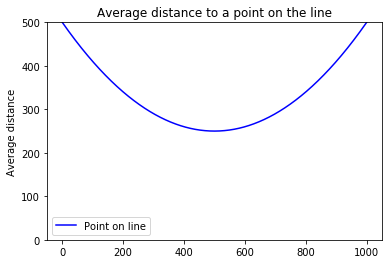

*******************

And finally, an interactive plot showing the average distance for mobile users for different drone locations.



interactive(children=(IntSlider(value=500, description='Position_Agent_A', max=1000), IntSlider(value=500, des…

In [0]:
# Finding the min through search
mini = 100000
maxi = 0
loc = [0,0]; locm = [0,0]
for a in range(1,101): # Cheating a bit using 100 instead of 1000.
  for b in range(1,101):
    if not a == b:
      t = np.mean([np.min([np.abs(i-a),np.abs(i-b)]) for i in range(1,101)])
      loc = [a,b] if t < mini else loc
      locm = [a,b] if t > maxi else locm
      mini = t if t < mini else mini
      maxi = t if t > maxi else maxi
      
print("Brute force Search for social welfare maximum = {:.2f} with one drone at location {} and the other at {}\n".format(mini*10,loc[0]*10,loc[1]*10))
print("and the Nash equilibria has an average distance of {:.2f} with one drone at {} an the other at {}, as proven earlier\n".format(mini*2*10,500,500))
print("The 'evil dictator optimum' however is {:.2f} at {} and {}, although one drone is not very happy.\n".format(maxi*10,locm[0],locm[1]))
print("Theoretically, drones at 0 and 0 would create a absolute maximum of 500 but the simulation above is not completely accurate.")
print("********************\n")
plt.figure()
y = [np.divide(np.mean([0,x])*x+np.mean([0,1000-x])*(1000-x),1000) for x in range(1001)]
plt.plot(y,'b',label="Point on line")
plt.title("Average distance to a point on the line")
plt.ylabel("Average distance")
plt.ylim([0,500])
plt.legend()
print("Now, a little plot over dividing lines, and argmin over the mean distance, would result in the center.\n")
plt.show()
print("*******************\n")
# Interactively
print("And finally, an interactive plot showing the average distance for mobile users for different drone locations.\n")
@interact_manual # Interactive plot
def game_plot(Position_Agent_A=(0,1000,1),Position_Agent_B=(0,1000,1)): # Location of agent A, adjusted interactively!!
  lA = Position_Agent_A
  lB = Position_Agent_B
  plt.figure()
  plt.plot([lB,lB],[0,1],'b--',label="Agent B")
  plt.plot([lA,lA],[0,1],'r--',label="Agent A")
  plt.legend()
  plt.xlabel("Position")
  plt.ylabel("Distance to nearest drone")
  plt.ylim([0,500])
  for i in range(1001):
    plt.bar([i],np.min([np.abs(i-lA),np.abs(i-lB)]))
  plt.title("Average distance to drones: {}".format(np.mean([np.min([np.abs(i-lA),np.abs(i-lB)]) for i in range(1,1001)])))



___
The above discussion should answer question 1 and 2 of the excercise. But if not clear, here's a summary: Hotelling's study on duopolies show that given two self interested agents who wants to have the most customers/coverage of a limited 1D area, the Nash equilibrium is both agents positioning themselves in the middle of the axis as that splits the customerbase. No agent can improve from this. For the drone scenario, the situation is the same, as the two drones compete for mobilephone connections, which are spread out equally along a 1D axis. For both customers, and mobile phone users, the social optimum would be if average distance to shop/drone was as little as possible. Since the average distance to one point on a line from all other points is the smallest when the target is in the middle, then it stands to reason that dividing the 1D line into $n$ segments, and placing the agents in the middle of those segments, creates the social optimum. For multiple agents however, Nash eq is a mixed strategy of any point in the middle two quartiles with equal probability.
___
Now we're moving to the "real world", that is, a 2D grid. Here I'll simulate 2 agents , and how they move around in the grid in a simultaneous repeated game of "wifi drones"! Each agent is independent of the other(s) in the sense that they will sample the space in a random direction, and if that location is better, they'll move there. The reason for random sampling is because in real life, oversampling costs time and mobile users on the ground won't necessarily connect to the closest one immediately. So, the drones move in a random direction and distance, samples, and if that's better coverage, then they stay there. If not, then they'll go back to the previous location. This way, drones need only to know the boundaries of the area, and how many users they have (users and coverage are interchangeable here).

In [0]:
print("An interactive simulation. Note that with drones=10, tau=5000, size=100, it might take a up to 30 minutes.\n")
print("However, I recommend running a few with time>2000, just to get better averages\n")
print("in the bottom heatmap, and estimation of mean coverage and mean number of users.\n")
print("Start is the kind of drone position start you want, but note that only 'Random' works for drones not equal to 4\n")
print("If not-random start, have drones at 4, movefac at gauss, and speed low for best results.")
print("Finally, avgdistfac is a tool for weighting the influence of avg dist to users (exponentially) relative to global optima. 0 = no effect.\n")
@interact_manual
def wifi_drone_game(tau=(10,5000,1), drones=(2,10,1), speed=(1,7,1), size=(10,100,1), start=["Random","Social_Optima","Center_Nash"],movefac=["uniform","gauss"],avgdistfac=(0,5,1)):

  # Inputs:
  # Tau = Time units
  # Drones = number of Drones
  # Speed = Max distance a drone can move
  # Size = Size of area (it's a square)
  
  m = [] # Social optima for squares
  for x in range(size):
    for y in range(size):
      m.append(np.sqrt((x-size/2)**2 + (y-size/2)**2))
  m = np.mean(m)

  area = [size,size] # Size of area in each dimension
  start_locations = {"Random":[[np.random.randint(0,size+1),np.random.randint(0,size+1)] for i in range(drones)], # Random starting locations
                     "Social_Optima":[[size/4,size/4],[3*size/4,3*size/4],[size/4,3*size/4],[3*size/4,size/4]], # 4 drone Social optima
                     "Center_Nash":[[size/2 + np.random.random()/10,size/2 + np.random.random()/10],
                                    [size/2 + np.random.random()/10,size/2 + np.random.random()/10],
                                    [size/2 + np.random.random()/10,size/2 + np.random.random()/10],
                                    [size/2 + np.random.random()/10,size/2 + np.random.random()/10]], # Center Nash
                    }
  
  class drone: # A drone
    def __init__(self, location):
      self.location = [location,[0,0]] # The drone's current and temp location in the 2D grid
      self.users = [0,0] # Number of current and temp users connected to the drone 
      self.mem = [0,0] # A memory of how to get back
      self.avgdist = 0
      
    def move(self,direction): # A function that moves the drone unless it would cross over boundary
      self.location[1] = np.add(self.location[0], direction) # Moving
      self.location[1] = np.add(self.location[0],self.mem) if np.sum(np.abs(self.mem)) > 0 else self.location[1] # Go back
      for i in range(2): # Checking boundary conditions
        if self.location[1][i] > size:
          self.location[1][i] = size
        elif self.location[1][i] < 0:
          self.location[1][i] = 0
      self.mem = [-1*x for x in direction] # Reverse coordinates
      
    def update(self,adjf): # Updates position and number of users for new location
      self.users[1] = self.users[1]*(adjf/self.avgdist)**avgdistfac
      if self.users[0] < self.users[1]: # If new place is better, reset memory (agent doesn't go back)
        self.mem = [0,0]
      self.location[0] = self.location[1]
      self.users[0] = self.users[1]
      self.users[1] = 0

  def best_drone(size,dronelist): # A function that updates the number of users each drone has
    a = np.zeros([size,size])
    b = []
    for x in range(size):
      for y in range(size):
        dist = [np.sqrt((x-d.location[1][0])**2 + (y-d.location[1][1])**2) for d in dronelist]
        a[y,x] = dist.index(min(dist))
        dronelist[dist.index(min(dist))].users[1] += 1
        dronelist[dist.index(min(dist))].avgdist += min(dist)
        b.append(min(dist))
    b=np.mean(b)
    return a,b # Returns a map of each drone's coverage, and mean distance to drones
    
  dronelist = [drone(start_locations[start][i]) for i in range(drones)] # Creating drones

  # Keeping track of stuff
  score_hist = [] # Number of users
  position_hist = [] # History of each drone's location
  mat = [] # Coverage history
  mean_dist = [] # Average distance to connections
  
  # Some plotting stuff before we begin movie time!
  fig,ax = plt.subplots()
  colrs = ["r","b","k","g","y","w","brown","orange","pink","grey"]
  ax.axis([0,size,0,size])
  im = ax.imshow(np.zeros([size,size]),vmin=0,vmax=drones)
  dot = ax.scatter([[0]*drones], [[0]*drones], c=colrs[0:drones], s=100, edgecolor="k")
  patches = [im] + [dot]
   
  def init():
    im.set_data(np.zeros([size,size]))
    dot.set_offsets([])
    return patches

  def animate(i):
    a = [x[0] for x in position_hist[i]]
    b = [x[1] for x in position_hist[i]]
    im.set_data(mat[i])
    dot.set_offsets(np.c_[a,b])
    return patches
  
  # Now we're ready to simulate
  for t in range(tau):
    # Each drone moves in a random direction
    if movefac == "uniform":
      [d.move([np.random.randint(-speed,speed+1),np.random.randint(-speed,speed+1)]) for d in dronelist] # Uniform movement speed distribution
    else:
      [d.move([np.random.normal(0,speed/2),np.random.normal(0,speed/2)]) for d in dronelist] # Uniform movement speed distribution
    # Updating scores
    a,b = best_drone(size,dronelist) 
    mat.append(copy.deepcopy(a))
    mean_dist.append(copy.deepcopy(b))
    # Moving drone to new location if better
    [d.update(m/drones) for d in dronelist]
    # Storing results
    score_hist.append([d.users[0] for d in dronelist])
    position_hist.append([d.location[0] for d in dronelist])

  anim = animation.FuncAnimation(fig, animate, init_func=init, frames=tau, interval=100, blit=True)
  plt.close("all")
  display(HTML(anim.to_html5_video()))
  
  # Average payoffs, avg. distance, nash, etc
  print("*******************************\n")
  print("The average payoffs for the drones are {}\n".format(np.mean(score_hist,axis=0)))  
  print("Mean distance to drones = {:.2f}, compared to Center = {:.2f}, and social optima = {:.2f} assuming area can be divided in n equal sized squares.\n".format(np.mean(mean_dist),m,m/drones))
  print("********************\n")
  # Location map
  matr = np.zeros([size,size])
  for x in position_hist:
    for y in x:
      matr[int(y[1])-1,int(y[0])-1] += 1
 
  fig,ax = plt.subplots()
  ax.imshow(matr,cmap="hot",interpolation="nearest", origin="lower")
  ax.add_artist(plt.Circle((size/2,size/2),(size/2)/1.5,color="w",fill=False))
  ax.add_artist(plt.Circle((size/2,size/2),(size/2)/2,color="w",fill=False))
  ax.add_artist(plt.Circle((size/2,size/2),(size/2)/20,color="w",fill=False))
  plt.title("Heatmap over location history")
  print("White circles represent estimated social optima for 3-4 drones and center\n")


An interactive simulation. Note that with drones=10, tau=5000, size=100, it might take a up to 30 minutes.

However, I recommend running a few with time>2000, just to get better averages

in the bottom heatmap, and estimation of mean coverage and mean number of users.

Start is the kind of drone position start you want, but note that only 'Random' works for drones not equal to 4

If not-random start, have drones at 4, movefac at gauss, and speed low for best results.
Finally, avgdistfac is a tool for weighting the influence of avg dist to users (exponentially) relative to global optima. 0 = no effect.



interactive(children=(IntSlider(value=2505, description='tau', max=5000, min=10), IntSlider(value=6, descripti…

___
To summarize the above, and answer question 3 of the excercise, we can observe the following.

While we know from theoretical analysis that there is a Nash equilibria in the middle for a 1D line for 2 drones, that also extends to higher dimensions, which can be observed in the animation (though randomness makes it unstable). In the 1D game, we saw that n>2 drones results in Nash being a mixed strategy. This is also the case in 2D. If all drones are packed in the middle in a tight ring, any movement away from the center is a net gain for a given drone (if the others stay still). Then the best bet for everyone is to follow suit (if sequential), as shown below.

Example of moving in grid (note: not exact counts due to grid vs. float positions and edges)


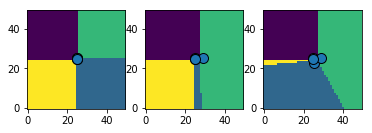

Left plot shows all drones equally placed around center. This is precarious ([650 649 576 625])!

because middle plot shows one drone moving off and gaining a lot (diff: [  47 -563  516    0])!

Which prompts the next drone to move off as well, shown in the right plot.(diff: [  50  157  368 -575])!



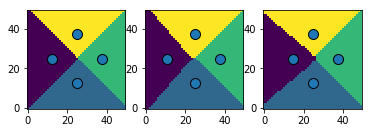

Left plot shows all drones equally placed near social optima (center of triangle). This is precarious ([675 649 600 576])!

because middle plot shows one drone moving off and losing a lot (diff: [-31  16   0  15])!

no matter which way it goes, shown in the right plot.(diff: [-30  16  -2  16])!



In [0]:
def best_drone(size,dronelist): # A function that updates the number of users each drone has
  a = np.zeros([size,size])
  b = []
  for x in range(size):
    for y in range(size):
      dist = [np.sqrt((x-d[0])**2 + (y-d[1])**2) for d in dronelist]
      a[y,x] = dist.index(min(dist))
      b.append(min(dist))
  b=np.mean(b)
  return a,b # Returns a map of each drone's coverage, and mean distance to drones
print("Example of moving in grid (note: not exact counts due to grid vs. float positions and edges)")
plt.figure()
plt.subplot(1,3,1)
size = 50
# All drones pretty much in center
dronelist = [[24.9,25.1],[25.1,24.9],[25.1,25.1],[24.9,24.9]]
a1,b1 = best_drone(size,dronelist)
plt.imshow(a1, origin="lower")
plt.scatter([d[0] for d in dronelist],[d[1] for d in dronelist], s=100, edgecolor="k")
#Moving one drone a bit off
plt.subplot(1,3,2)
dronelist = [[24.9,25.1],[25.1,24.9],[29.1,25.1],[24.9,24.9]]
a2,b2 = best_drone(size,dronelist)
plt.imshow(a2, origin="lower")
plt.scatter([d[0] for d in dronelist],[d[1] for d in dronelist], s=100, edgecolor="k")
# Moving another drone a bit off
plt.subplot(1,3,3)
dronelist = [[24.9,25.1],[25.1,22.9],[29.1,25.1],[24.9,24.9]]
a3,b3 = best_drone(size,dronelist)
plt.imshow(a3, origin="lower")
plt.scatter([d[0] for d in dronelist],[d[1] for d in dronelist], s=100, edgecolor="k")
plt.show()
print("Left plot shows all drones equally placed around center. This is precarious ({})!\n".format(np.unique(a1,return_counts=True)[1]))
print("because middle plot shows one drone moving off and gaining a lot (diff: {})!\n".format(np.unique(a2,return_counts=True)[1]-np.unique(a1,return_counts=True)[1]))
print("Which prompts the next drone to move off as well, shown in the right plot.(diff: {})!\n".format(np.unique(a3,return_counts=True)[1]-np.unique(a1,return_counts=True)[1]))

plt.figure()
plt.subplot(1,3,1)
# All drones at social optima
dronelist = [[12.5,25.],[25.,12.5],[37.5,25.],[25.,37.5]]
a1,b1 = best_drone(size,dronelist)
plt.imshow(a1, origin="lower")
plt.scatter([d[0] for d in dronelist],[d[1] for d in dronelist], s=100, edgecolor="k")
#Moving one drone a bit off
plt.subplot(1,3,2)
dronelist = [[10.5,25.],[25.,12.5],[37.5,25.],[25.,37.5]]
a2,b2 = best_drone(size,dronelist)
plt.imshow(a2, origin="lower")
plt.scatter([d[0] for d in dronelist],[d[1] for d in dronelist], s=100, edgecolor="k")
# Moving another drone a bit off
plt.subplot(1,3,3)
dronelist = [[14.5,25.],[25.,12.5],[37.5,25.],[25.,37.5]]
a3,b3 = best_drone(size,dronelist)
plt.imshow(a3, origin="lower")
plt.scatter([d[0] for d in dronelist],[d[1] for d in dronelist], s=100, edgecolor="k")
plt.show()
print("Left plot shows all drones equally placed near social optima (center of triangle). This is precarious ({})!\n".format(np.unique(a1,return_counts=True)[1]))
print("because middle plot shows one drone moving off and losing a lot (diff: {})!\n".format(np.unique(a2,return_counts=True)[1]-np.unique(a1,return_counts=True)[1]))
print("no matter which way it goes, shown in the right plot.(diff: {})!\n".format(np.unique(a3,return_counts=True)[1]-np.unique(a1,return_counts=True)[1]))
#unique(a, return_counts=True)

In a simultaneous game however, through backwards induction, every agent should move one unit further out than the others, but not further than length axis / 2, because at that point, every direction gives worse coverage, as seen in plots above (even with some uneveness in grid). This means that for n > 2 drones, small step iterated game, then Nash = a ring shaped structure.

In the animation above however, we don't always get that Nash equilibrium emerging.

Instead, one can see that drones often clump together that then "battle" it out for position, as is expected from a game theoretical point (the best place to be is on just the edge of another agent). We can also observe that over time, the drones tend to have quite similar average user count. Both these observations indicate that the agents are somewhat "rational".

We can also observe that the agents hover around the middle in a ring shape (if n > 3), although not exactly in the center. The heatmap of location history confirms this observation. Also evident is that as long as there's a rough equality in coverage, the drones tend to keep formation, while as soon as inequality arises, one can observe more rapid dynamics as new positions turn out to be better more often than not. As such, there emerges a semi stable dynamic of a ring, with equal distance between agents, that approaches the social optima with 3-4 drones (which is also the Nash in an iterative game with small movements). For five drones, one should be in the center. For more drones, then the optimal structure changes according to number of drones. Theoretically, the optima can be calculated as avg. distance if all drones in the center, divided by number of drones, as with the 1D case. For the 4 drone case this is close to the small step iterated Nash.

There are 3 main reasons why we don't see a stable center Nash (2 drones) or a social optima nash (4 drones), or an extension of the mixed strategy nash in the 1D condition with multiple drones. 
1. if a random sampling didn't turn out to be better, the drone returns to it's previous position, which might not be a good spot anymore since the other agents might have moved as well. Since the game is simultanous, then small random changes can cause big divergences in optimal behavior, such as, location B being better than A, but only before everyone else has decided on their positions, at which point it might be worse.

2. An agent can "block" in another agent, such that the only way to improve is to  cross over the edge of another agent's sphere of influence, which might require a higher speed than it's random walk allows.

3. With multiple agents, there's a risk inherent in moving. So while the agents will tend to form a semi stable ring constellation, it might move around the area, and as such it's hard for the agents towards the edge to break free. 

In other words, given the stochastic movement stability is hard to find. There are some solutions that could be implemented to "improve" behavior.
1. Memory of number of users, x rounds back, so that it moves in the direction of where it usually gets good numbers, if it doesn't improve in the direction it's going. Adding this option would add assumptions to the game however, and as such is not implemented here.

2. Have a non-uniform distribution in "speed" so that the drone occasionally makes bigger jumps to avoid local minima. This has been implemented, and the curious reader can select the "gauss" option in the parameters.
3. Communication between agents such as knowing how many users they have, or distance between them. Not implemented here.
4. Sequential checking, i.e. a drone moves, samples, and then decides if it's staying or not. Before any other drones does anything. This would increase computational complexity a lot due to calculation of users, but would result in better decision making and more stable structures.

So in summary, to answer the questions in point 3 of the excercise directly:
1. The simulation does not end up in a Nash equilibria with more than 2 agents, due to randomness, but the overall positioning is an approximation for 4 drones. For 2 agents, the center will be on average a hotspot.
2. The simulation tends towards somewhere between a social welfare optimum and the "worst" which is all drones in the center, though due to randomness, seldom achieves it. The social optimum is to divide the area in n equal areas (shape, size) and have a drone in the geometric center of it, just like with a 1D space. But this division is not stable. If you divide the area in 9 for example, then drones along the edges are incentiviced to push towards the middle.

___
Now, let's move on to game matrices. A game matrix is a utility matrix, or payoff matrix, for different choices an agent can make vs the responses of other agents. While in decision theory where one is more concerned with the choices of an agent, given a scenario, in a game matrix one explicitely models the choices of other agents as well. For example, in the drone scenario above, we could say that an agents best response is always to move in the direction of more coverage if such a direction exist. For the 1D line, this will end with all agents battling it out in the center. Or in a simultaneous choice variant, then one could simulate agents who update their probabilities for choosing a particular spot according to average payoff. I've done this below. One can see that for 2 agents, with some winbonus (reward for being best, indicating no real need to improve position) , that over time probabilities converge on the middle. With 3 agents however, it reflects more a flatter distribution in the middle 2 quartiles, as expected from theory. More agents results in a bigger and flatter spread.

In [0]:
print("Drones is number of drones, rounds is number of iterations (300 recommended), samples is how much to sample each probability dist\n")
print("with 2xsize recommended, size is length of 1D line (10-20*drones recommended), and winbonus is how important it is to win, i.e. an indication\n")
print("that there's little reason to improve location.")
@interact_manual
def wifi_dronesB(drones=(2,6,1),rounds=(1,300,1),size=(10,102,1), samples=(10,500,1),winbonus=(1,10,1)):
  
  gmat = np.zeros((drones,size))+1/size # Game matrix
  resmat = [] # Results
  
  def game(pos,size): # Game function
    score = [0]*len(pos)
    for i in range(size): # Checking which is neares
      x = [np.abs(i-y+(np.random.random()/100)) for y in pos] # Addind a tiny random to resolve stacking
      score[x.index(min(x))] += 1
    for i in np.where(score == max(score))[0]:
      score[i] *= winbonus
    return score
  
  def normalize(mat): # Normalizes a 2D matrix
    for i in range(len(mat)):
      mat[i] /= np.sum(mat[i])
    return mat
  
  # Some plotting stuff before we begin movie time!
  fig,ax = plt.subplots()
  barcol = ax.bar(np.linspace(0,size-1,size),np.mean(gmat,axis=0))
  ax.set_ylim([0,1])
  
  def init():
    for i in range(len(barcol)):
      barcol[i].set_height(np.mean(gmat,axis=0)[i])
    return barcol

  def animate(i):
    for idx in range(len(barcol)):
      barcol[idx].set_height(resmat[i][idx])
    return barcol
  
  # Now we're ready to simulate
  for t in range(rounds):
    scores = np.zeros((drones,size))
    counts = np.zeros((drones,size))+0.001
    # Ten, each drone picks a location, we'll do this some times
    for it in range(samples):
      positions = [np.random.choice(size, p=gmat[i]) for i in range(drones)]
      # Calculate score
      temp = game(positions,size)
      # Updating probabilities
      for i in range(drones):
        scores[i,positions[i]] += temp[i]
        counts[i,positions[i]] += 1
    # And updating our game matrix
    temp = np.divide(scores,counts)   
    gmat = normalize(np.add(gmat,normalize(temp)))
    
    # And store the results
    resmat.append(np.mean(gmat,axis=0))
  print("Probability distribution of picking a specific location, averaged over drones")
  anim = animation.FuncAnimation(fig, animate, init_func=init, frames=rounds, interval=100, blit=True)
  plt.close("all")
  display(HTML(anim.to_html5_video()))
  

Drones is number of drones, rounds is number of iterations (300 recommended), samples is how much to sample each probability dist

with 2xsize recommended, size is length of 1D line (2-3*drones recommended), and winbonus is how important it is to win, i.e. an indication

that there's little reason to improve location.


interactive(children=(IntSlider(value=4, description='drones', max=6, min=2), IntSlider(value=150, description…

___
Let's look at game matrices. The following is a matrix for 2 agents playing wifi drones on a 1D line of length 5. Each cell indicates expected payoff, and equal placement is resolved with cointoss. For example, center position, gives 2 units to the left, 2 to the right, and 1 where you stand.

|  |          1 |          2 |          3 |          4 |          5 |
|---|------------|------------|------------|------------|------------|
| **1** | (2.5, 2.5) | (1.0, 4.0) | (1.5, 3.5) | (2.0, 3.0) | (2.5, 2.5) |
| **2** | (4.0, 1.0) | (2.5, 2.5) | (2.0, 3.0) | (2.5, 2.5) | (3.0, 2.0) |
| **3** | (3.5, 1.5) | (3.0, 2.0) | (2.5, 2.5) | (3.0, 2.0) | (3.5, 1.5) |
| **4** | (3.0, 2.0) | (2.5, 2.5) | (2.0, 3.0) | (2.5, 2.5) | (4.0, 1.0) |
| **5** | (2.5, 2.5) | (2.0, 3.0) | (1.5, 3.5) | (1.0, 4.0) | (2.5, 2.5) |

Since this is a symmetric game, we can analyze from the perspective of the top agent (i.e. (2.5, **2.5**)). We can see that choosing position 1 (collumn 1) is strictly dominated by position 2. That leaves out collumn and row 1 and 5 (symmetric game). This gives the revised table:

|  |         2 |          3 |          4 |
|---|------------|------------|------------|
| **2** | (2.5, 2.5) | (2.0, 3.0) | (2.5, 2.5) |
| **3**  | (3.0, 2.0) | (2.5, 2.5) | (3.0, 2.0) |
| **4**  | (2.5, 2.5) | (2.0, 3.0) | (2.5, 2.5) |

Again, position 2 is strictly dominated by position 3. Which leaves us with a best response in the middle.

However, while the above analysis is general for any length of line, we need a $5^n$ cells to represent a $n$ drone game, which is NP hard. But, for n=3 we can try by doing the following shortcut:

|  |          1 |          2 |          3 |          4 |          5 |
|---|------------|------------|------------|------------|------------|
| **1** | $3.\overline{3}$/2 | 4/2 | 3.5/2 | 3/2 | 2.5/2 |
| **2** | 1/2 | $3.\overline{3}$/2 | 3/2 | 2.5/2 | 2/2 |
| **3** | 1.5/2 | 2/2 | $3.\overline{3}$/2 | 2/2 | 1.5/2 |
| **4** | 2/2 | 2.5/2 | 3/2 | $3.\overline{3}$/2 | 1/2 |
| **5** | 2.5/2 | 3/2 | 3.5/2 | 4/2 | $3.\overline{3}$/2 |

Here, in this slightly ugly table, we've added in the payoffs for agent 3, depending on where agent 1 and 2 are positioned, using the columns. For example, if all agents go to the center, then it's 2/3 probability that the agent will be in the extreme position (cointoss), with a reward of 2.5 in each position. The other values are calculated similarily. However, this table is only valid for when agent 2 and 3 choose the same spot. The inverse of this table would be for when agent 1 and 2 choose the same spot. But it's already clear that, while position 2 strictly dominates position 1, position 3 doesn't strictly dominate position 2 anymore! In other words, as expected, the best response is no longer in the middle, and so considering this table alone would warrant a mixed strategy.

At any rate, it becomes a combinatorial nightmare quite quickly. In contrast, the earlier simulation grows due to size of area (lenght of axis) and number of time units, $\tau * size^2$. However, the game matrix approach does represent a complete description, while the simulation is only an approximation limited by stochastic movement in an iterated fashion.
___
Finally, I'll discuss expanding the 2D wifi drone model to include some knowledge about other agents or the world so as to approach the social optima even further or exactly.

Given that sozial optima is to divide the area in equally sized polygons, i.e. tessalation using triangles, squares, or hexagons, then one should find a rule that could aid in this. In the above simulation I've used squares in the calculations, though hexagons would probably reduce it even further with enough drones. But it would depend on the amount of drones one have.

Options:
1. Implemented. Take into account average distance to drone, globally and locally. The most likely effect of this, on the local level, is to reduce the amount of "battling" or clustering between drones. Depending on weight of utility given to avg. dist. then it would provide a counter against moving towards others which is normally a good choice. This is added to the main simulation with the factor avgdistfac (adf): $utility = users * \dfrac{GAD}{AD}^{adf}$. Some simulations show that for 4 drones, this reduces avg. local distance towards the social optima, but with too high adf it increases again. Qualitatively, agents tend to center more in their coverage areas. I assume here that maximum served bandwith = minimum average distance to drones.
2. Not implemented. Aim for equal distance between the two closest drones, inspired by how bird flocks operate. This would ensure an even spread of drones depending on weight of this utility.
3. Not implemented. Movement patterns, such as spirals used in search and rescue, adjusted by number of users, avg.dist. and nearest neighbours distance. Would ensure a more targeted search over the area. Not strictly an objective value.
4. Not implemented. Scale movement speed according to objective value (with or without implementing other options) relative to max estimated objective value. This would ensure that the smaller share of the pie the drone has, the more erratic it's behavior. Could be useful to escape cornering and bad local minima. Strictly not an objective value.
5. Not implemented. Battery could be useful, as sampling involves movement which requires more energy. Given that recharging would reduce utility to 0 for a while (hypotetically), then battery could be factored into the objective value such that more battery = more exploration (if need be), and less battery = a more wait and see approach. This would potentially ensure that the game becomes more stable over time.
___
In summary, for question 4 of the excercise, game matrices represent a complete description of the game being played, but it grows in order $size^n$ where size is length of line and n is number of drones. Clearly NP hard. The decision theory approach is much simpler, but is colored by uncertainties (randomness, imperfect rules, partial information), although it scales polynomially. It might not find the Nash or the social optima, but it can approach it depending on rules and other parameters. Finally, I discuss some options for improving or adding to the objective value (utility) of the drones using for example information from avg.dist. to users, distance to other drones, and such.



